# Projeto de Portfólio: Processamento de Linguagem Natural: Análise de Sentimentos

## **Introdução**

O presente projeto tem como objetivo apresentar análises acerca de feedbacks de consumidores da Amazon e insights derivados das análises. O projeto situa-se na análise de dados e no processamento de linguagem natural.
Os dados foram obtidos a partir do dataset diponível no Kaggle:
```
# https://www.kaggle.com/sid321axn/amazon-alexa-reviews
```





# Questão de Negócio:

O time de marketing tem interesse em obter um relatório acerca dos feedbacks dos consumidores de produtos da Amazon como Alexa Echo, Echo dots, Alexa Firesticks etc. A equipe está interessada em saber:

1.   Qual a nota média de cada variação do produto?
2.   Os produtos, em geral, tendem a causar feedbacks positivos ou negativos?
3.   Quais as palavras mais frequentes em contextos positivos e em contextos negativos?

Dessa forma, realizo as etapas seguintes para responder a essas perguntas.

# **1 Limpeza de dados**
## 1.1 Importação e limpeza


Inicialmente, eu importo as primeiras bibliotecas.

In [4]:
#Importing the first libs
import numpy as np #For scientifical and mathmatical works
import pandas as pd #For dataframe and series manipulations
import seaborn as sns #For data visualization
import matplotlib.pyplot as plt #For data visualization

Conforme indicado pelas hashtags ao lado das importações, **numpy** é usado para manipulação científico-matemático dos dados; **pandas**, por sua vez, é usado para lidar com séries e dataframes. As próximas duas bibliotecas, **seaborn** e **matplotlib** são usadas para visualização gráfica.
Uma vez que as importações hajam sido feitas, eu importo o documento csv com separadores tabulares e verifico o *dataframe* gerado.

In [5]:
#Importing dataset
feedbacks_df = pd.read_csv('/content/amazon_alexa.tsv', sep='\t')

In [6]:
#Checking in importation
feedbacks_df.head()

rating  ... feedback
0       5  ...        1
1       5  ...        1
2       4  ...        1
3       5  ...        1
4       5  ...        1

[5 rows x 5 columns]

Acima está o dataframe gerado. As primeiras cinco linhas são geradas, conforme esperado pela função **head ()**. Há visivelmente cinco colunas. As colunas são preenchidas com tipos de dados. No entanto, antes de acessar essas informações, verifico o formato do dataframe.

In [7]:
#Looking at shape
feedbacks_df.shape

(3150, 5)

Como pode-se ver, há 3150 linhas e cinco colunas.

Após essa observação, verifico o que foi mencionado acima sobre os tipos de dados. Para isso, utilizo a função **info ()**, que informa para além dos tipos de dados.

In [8]:
#Accessing infos
feedbacks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


Segundo o gerado, são 3150 entradas, ou seja, feedbacks, de modo que os Id's das linhas variam de 0 a 3149. Há cinco colunas, conforme já destacado. Atentando-se para a coluna ** Non-Null Count **, verifica-se que não há ausência de valor entre as linhas. **Dtype** relata que há duas colunas do tipo **int** e três do tipo **object**.

A ausência de valor também pode ser verificada usando a função abaixo.

In [9]:
#Checking missing values
feedbacks_df.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

Como pode-se averiguar, não há valor faltando.

Outra informação a ser investigada é a presença de valores negativos, pois, para o contexto da base de dados, os valores negativos são inconsistentes.

In [10]:
#Verifying negative values
feedbacks_df.min()

rating                     1
date                1-Jul-18
variation              Black
verified_reviews            
feedback                   0
dtype: object

Como resultado acima, não há valores negativos.

É interessante investigar a temporalidade dos dados.

In [11]:
#Checking the time
np.unique(feedbacks_df.date)

array(['1-Jul-18', '1-Jun-18', '10-Jul-18', '10-Jun-18', '11-Jul-18',
       '11-Jun-18', '12-Jul-18', '12-Jun-18', '13-Jul-18', '13-Jun-18',
       '14-Jul-18', '14-Jun-18', '15-Jul-18', '15-Jun-18', '16-Jul-18',
       '16-Jun-18', '16-May-18', '17-Jul-18', '17-Jun-18', '17-May-18',
       '18-Jul-18', '18-Jun-18', '18-May-18', '19-Jul-18', '19-Jun-18',
       '19-May-18', '2-Jul-18', '2-Jun-18', '20-Jul-18', '20-Jun-18',
       '20-May-18', '21-Jul-18', '21-Jun-18', '21-May-18', '22-Jul-18',
       '22-Jun-18', '22-May-18', '23-Jul-18', '23-Jun-18', '23-May-18',
       '24-Jul-18', '24-Jun-18', '24-May-18', '25-Jul-18', '25-Jun-18',
       '25-May-18', '26-Jul-18', '26-Jun-18', '26-May-18', '27-Jul-18',
       '27-Jun-18', '27-May-18', '28-Jul-18', '28-Jun-18', '28-May-18',
       '29-Jul-18', '29-Jun-18', '29-May-18', '3-Jul-18', '3-Jun-18',
       '30-Jul-18', '30-Jun-18', '30-May-18', '31-Jul-18', '31-May-18',
       '4-Jul-18', '4-Jun-18', '5-Jul-18', '5-Jun-18', '6-Jul-18',
   

O resultado retornado não é visualmente claro para se compreender o intervalo do período, sendo assim, faz-se necessário um método que torne essa análise mais adequada.

Um método interessante é a conversão da coluna *date* para o tipo datetime, pois, como visto, a mesma está como *object*.

In [12]:
#Transforming col date into datetime
feedbacks_df.date = pd.to_datetime(feedbacks_df.date)
feedbacks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   rating            3150 non-null   int64         
 1   date              3150 non-null   datetime64[ns]
 2   variation         3150 non-null   object        
 3   verified_reviews  3150 non-null   object        
 4   feedback          3150 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 123.2+ KB


De acordo com o retornado, a conversão para tipo *datetime* está corretamente efetuada. Em seguida busco o intervalo e a quantidade de dias.

In [17]:
#Searching for time range
feedbacks_df.date.min(), feedbacks_df.date.max(), len(np.unique(feedbacks_df.date))

(Timestamp('2018-05-16 00:00:00'), Timestamp('2018-07-31 00:00:00'), 77)

Segundo o retornado, o intervalo é entre 16 de maio de 2018 e 31 de julho de 2018, ou seja, dois meses e meio.

Após atentar-me para a coluna *date*, interessa-me observar os valores únicos da coluna *rating*

In [ ]:
#Checking the range of the rate column along with the frequency of each rate.
np.unique(feedbacks_df.rating)

array([1, 2, 3, 4, 5])

De acordo com o retornado, as notas variam de 1 a 5.
5 e 4 são feedbacks positivos. 1, 2 e 3 são feedbacks negativos.
A coluna de feedback está alinhada com a coluna de avaliação. Assim, avaliação igual a 4 ou 5 deve ter 1 na coluna de feedback. Os outros valores devem apresentar 0 na coluna de feedback. A seguir, verifica-se que a coluna de feedback possui apenas 0 e 1 como valores. Faz-se necessário verificar se os dados são coerentes em relação ao cruzamento, o que é realizado posteriormente.

Tratando-se ainda de *rating*, realizo visualização gráfica concernente à proporção das notas entre si.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


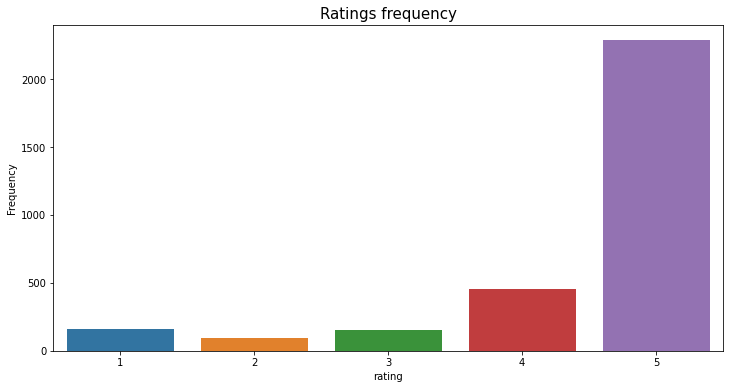

In [ ]:
#Generating ratings frequency graph
plt.figure(figsize=(12,6))
sns.countplot(feedbacks_df.rating)
plt.title('Ratings frequency', fontsize=15)
plt.ylabel('Frequency', fontsize=10);

Conforme o gráfico, a nota mais frequente é o 5, seguida por 4. Isso indica que em maior parte, há bons reviews dos usuários que se manifestaram. Há uma porção não satisfeita que deve ser avaliada.

Em questões percentuais, tem-se o seguinte:

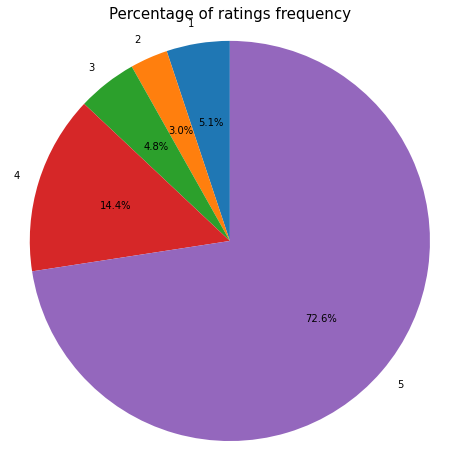

In [ ]:
#Generating pie graph
plt.figure(figsize=(8,8))
plt.pie(np.unique(feedbacks_df.rating, return_counts=True)[1],
        labels=np.unique(feedbacks_df.rating, return_counts=True)[0], autopct='%1.1f%%', startangle=90)
plt.title('Percentage of ratings frequency', fontsize=15)
plt.axis('equal');

Ao somar-se a frequência percentual das notas 1, 2 e 3, pode-se averiguar que os feedbacks negativos não superam os feedbacks positivos iguais a 4 em termos de proporção.

Em termos absolutos tem-se o seguinte:

In [ ]:
np.unique(feedbacks_df.rating, return_counts=True)

(array([1, 2, 3, 4, 5]), array([ 161,   96,  152,  455, 2286]))

Frequências absolutas das notas:

1: 161

2: 96

3: 152

4: 455

5: 2286

Atentando-se ao feedback, expecta-se que haja uma correspondência com a coluna *rating*.

In [ ]:
#Checking column feedback
np.unique(feedbacks_df.feedback)

array([0, 1])

De acordo com o resultado, há somente dois valores, os quais estão coerentes às informações gerais do dataset.

Como mencionado acima, faz-se necessário realizar a análise de coerência entre as colunas *rating*  e *feedback*, pois, expecta-se que haja equivalência informacional entre si.

0 equivale a 1, 2 3 da coluna *rating*, enquanto 1 equivale a 4 e 5.
Abaixo está o código para essa checagem.

In [ ]:
#Checking inconsistency between feedback and rating
for fb in feedbacks_df.feedback:
  for rt in feedbacks_df.rating:
    if fb == 1:
      rt >= 4
    elif fb == 0:
      rt <=3
    else:
      print(fb,' is inconsistent in related to ', rt)

Se houvesse inconsistência, o código retornaria "**fb is inconsistent in related to rt**", entretanto, não houve tal resposta, sendo *fb* uma constante da coluna *feedback* e *rt* uma constante da coluna *rating*. Assim, sabe-se que não há inconsistência entre essas colunas.

Em questões gráficas, tem-se o seguinte:



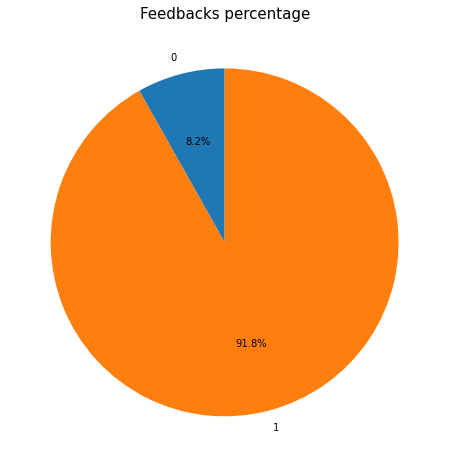

In [ ]:
#Generating feedback percentage graph
plt.figure(figsize=(8,8))
plt.pie(np.unique(feedbacks_df.feedback, return_counts=True)[1], labels=np.unique(feedbacks_df.feedback, return_counts=True)[0],
        autopct='%1.1f%%', startangle=90)
plt.title('Feedbacks percentage', fontsize=15);

Em torno de 92% dos feedbacks são positivos. Isso equivale a:

In [ ]:
print('{} feeddbacks dos 3150.'.format(round(3150*0.92)))

2898 feeddbacks dos 3150.


Há aproximadamente 8% de usuários que não apresentaram satisfação para com o produto, em 2 meses e meio.

A última coluna a ser avaliada, neste momento, é a *variation*.

In [ ]:
#Verifying coherence between rating and feedback informations
print('Unique values of the feature variation: ', feedbacks_df.variation.unique())
count = 0
for word in feedbacks_df.variation.unique():
  count += 1
print('There are {} variations.'.format(count))

Unique values of the feature variation:  ['Charcoal Fabric ' 'Walnut Finish ' 'Heather Gray Fabric '
 'Sandstone Fabric ' 'Oak Finish ' 'Black' 'White' 'Black  Spot'
 'White  Spot' 'Black  Show' 'White  Show' 'Black  Plus' 'White  Plus'
 'Configuration: Fire TV Stick' 'Black  Dot' 'White  Dot']
There are 16 variations.


Conforme o retornado, há 16 variações de produto.

# Análise Exploratória


Adentrando mais especificamente na análise exploratória, em questão de frequência, tem-se graficamente  o seguinte:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


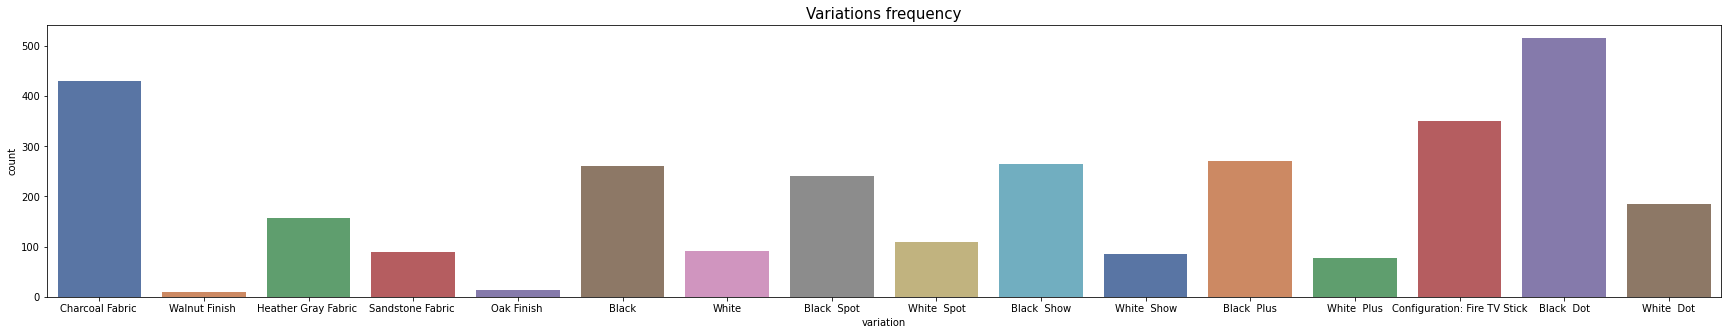

In [ ]:
#Generating variations frequency graph
plt.figure(figsize=(30,5))
sns.countplot(feedbacks_df.variation, palette='deep')
plt.title('Variations frequency', fontsize=15);

Black Dot e Charcoal Fabric são os produtos mais frequentes no dataset. Os menos frequentes são Walnut Finish e Oak Finish. Estar mais ou menos frequente nesse dataset não implica em mais ou menos vendido, pois, é possível que os produtos que possuem menor feedback sejam obtidos por pessoas com menos relação com esse tipo de interação entre loja e cliente. No tocante à quantidade de vendas de cada produto, faz-se necessário trabalhar com base de dados que informe esse aspecto.

Em termos de avaliação média das variáveis, tem-se o seguinte:

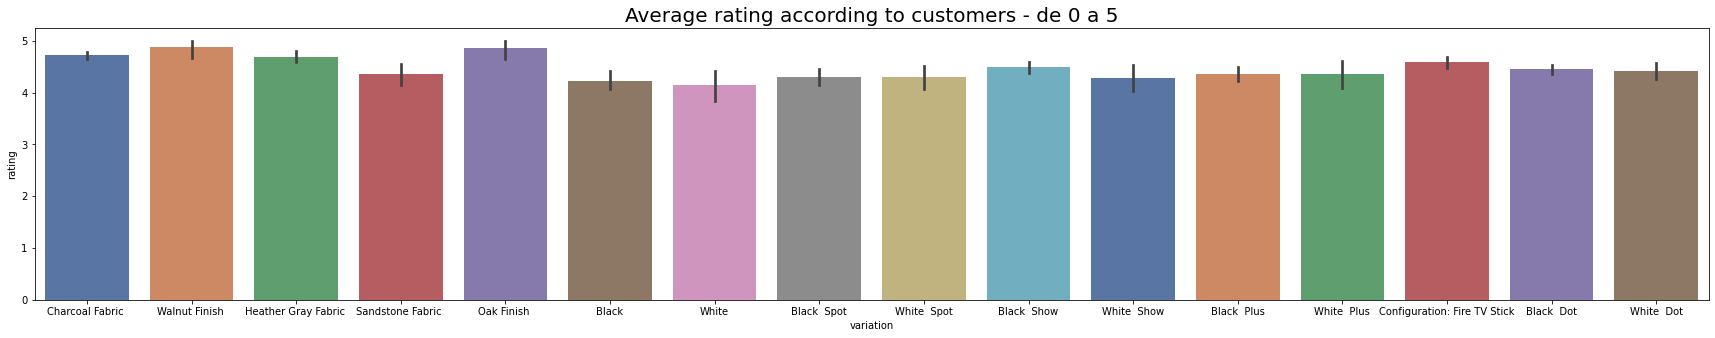

In [19]:
plt.figure(figsize=(30,5))
sns.barplot(x='variation', y='rating', data=feedbacks_df, palette='deep')
plt.title('Average rating according to customers - de 0 a 5', fontsize=20);

Observando o gráfico, pode-se averiguar uma uniformidade aproximada entre as avaliações médias dos produtos. Contudo, ressalta-se que não há uma uniformidade de avaliação; cada produto recebeu uma quantidade particular de avalicação.

Em relação à positividade do produto, tem-se:

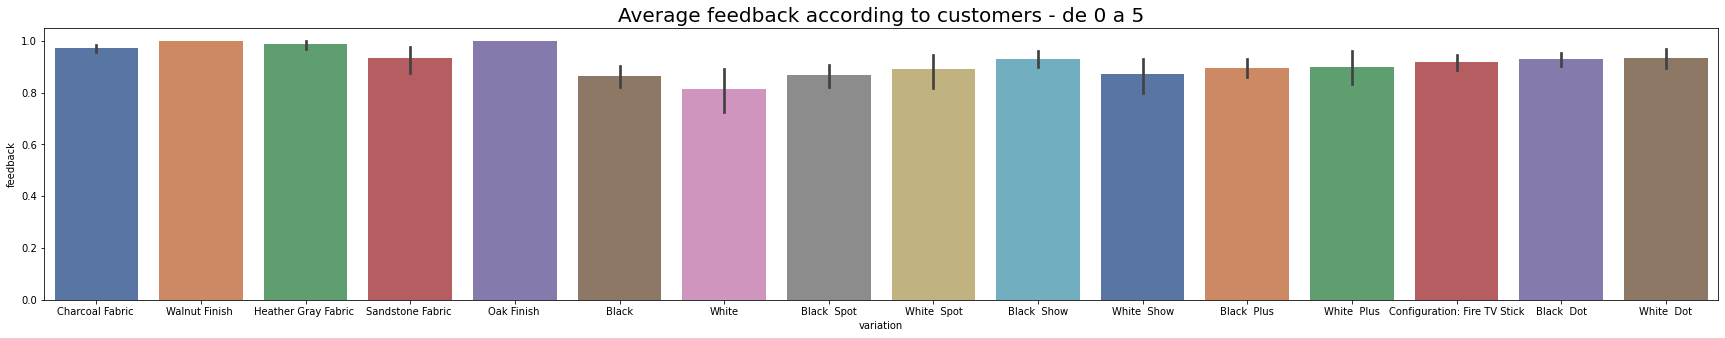

In [20]:
plt.figure(figsize=(30,5))
sns.barplot(x='variation', y='feedback', data=feedbacks_df, palette='deep')
plt.title('Average feedback according to customers - de 0 a 5', fontsize=20);

Em geral, os produtos estão positivos de acordo com a avaliação dos usuários. Dentre os produtos, o menos positivo é o White.

Para resolução de insatisfação, é interessante gerar uma word cloud referente aos produtos menos positivos a fim de busca por indicações de causas de insatisfação.

Em seguida, crio um dataframe contendo as variações e suas respectivas avaliações médias, de modo que respondo à primeira questão de negócio (Qual a nota média de cada produto?). Esse procedimento auxilia a perceber melhor a avaliaçã dos clientes. Dessa forma, pode-se chegar a um insight acerca do aprimoramento dos produtos.

Olhando os dois primeiros produtos, pode-se averiguar que os mesmos não possuem feedbacks negativos, diferentemente dos demais. Entretanto, olhando o gráfico de frequência, percebe-se que os mesmos possuem baixa frequência de avaliação, de modo que apenas pode-se afirmar que com pouca avaliação, não houve feedback negativo. Em contra partida, observando, nas últimas linhas, os produtos com menor positividade, ainda que sejam os de menor positividade, mesmo assim estão com valores interessantes, conforme a análise gráfica anterior aponta.

Ressalto que melhor ainda é a análise de nota média de cada produto. Esse procedimento está realizado a seguir.

# Respondendo à Primeira Questão de Negócio

# Qual a nota média de cada produto?

In [ ]:
#Creating dataframe with the variations and their respective rating average.
mean_rating_var_df = pd.DataFrame()
variation = []
mean = []
for var in feedbacks_df.variation:
  _mean = feedbacks_df[feedbacks_df.variation == var ]['rating'].mean()
  if var not in variation:
    variation.append(var)
    mean.append(_mean)
mean_rating_var_df['variation'] = variation
mean_rating_var_df ['mean_rating'] = mean

In [ ]:
#Descending order
mean_rating_var_df.sort_values('mean_rating', ascending=False)

variation  mean_rating
1                 Walnut Finish      4.888889
4                    Oak Finish      4.857143
0               Charcoal Fabric      4.730233
2           Heather Gray Fabric      4.694268
13  Configuration: Fire TV Stick     4.591429
9                    Black  Show     4.490566
14                    Black  Dot     4.453488
15                    White  Dot     4.423913
11                   Black  Plus     4.370370
12                   White  Plus     4.358974
3              Sandstone Fabric      4.355556
8                    White  Spot     4.311927
7                    Black  Spot     4.311203
10                   White  Show     4.282353
5                          Black     4.233716
6                          White     4.142857

Os dois produtos mais bem avaliados são Walnut Finish e Oak Finish, enquanto Black e White são os menos bem avaliados, contudo, sendo 5 a nota máxima, os mesmos estão, em geral, agradando. Ressalto novamente que há uma desigualdade de frequência de avaliação entre os produtos. Isso torna a nota média de cada produto, devido ao intervalo de dois meses e meio, relativa uma para com as outras. A médio e longo prazo, a quantidade de dados estará mais apropriada.

Destaco que a empresa deve considerar em que vem acertando acerca de ambos os produtos assim como também em que vem errando. A partir desse mapeamento é possível tornar os produtos melhores ou produzir gerações melhores.

Em seguida, realizo a análise referente à coluna *feedback*.

# **Respondendo à Segunda Questão de Negócio**

## Os produtos, em geral, tendem a causar feedbacks positivos ou negativos?

In [ ]:
#Creating dataframe with the variations and their respective feedback average.
mean_feedback_var_df = pd.DataFrame()
variation = []
mean = []
for var in feedbacks_df.variation:
  _mean = feedbacks_df[feedbacks_df.variation == var ]['feedback'].mean()
  if var not in variation:
    variation.append(var)
    mean.append(_mean)
mean_feedback_var_df['variation'] = variation
mean_feedback_var_df ['mean_feedback'] = mean

In [ ]:
#Descending order
mean_feedback_var_df.sort_values('mean_feedback', ascending=False)

variation  mean_feedback
1                 Walnut Finish        1.000000
4                    Oak Finish        1.000000
2           Heather Gray Fabric        0.987261
0               Charcoal Fabric        0.972093
15                    White  Dot       0.934783
3              Sandstone Fabric        0.933333
9                    Black  Show       0.932075
14                    Black  Dot       0.930233
13  Configuration: Fire TV Stick       0.920000
12                   White  Plus       0.897436
11                   Black  Plus       0.896296
8                    White  Spot       0.889908
10                   White  Show       0.870588
7                    Black  Spot       0.867220
5                          Black       0.865900
6                          White       0.813187

Em geral, a opinião dos consumidores é positiva acerca do produto. Os dois primeiros produtos da lista não apresentam avaliações negativas, entretanto, a frequência de feedback que recebem é a menor dentre as demais variações. Conforme afirmado anteriormente, nem mesmo as duas últimas variações da lista recebem baixa estima dos clientes.

Em seguida, unifico os dois dataframes gerados, pois o unificado é o entregue ao time de marketing.

## **Dataframe para ser entregue ao time de Marketing**

# Resposta para as duas primeiras questões de negócio

In [ ]:
#Merging new dataframes
means_df = pd.merge(mean_feedback_var_df, mean_rating_var_df, on='variation')
means_df

variation  mean_feedback  mean_rating
0               Charcoal Fabric        0.972093     4.730233
1                 Walnut Finish        1.000000     4.888889
2           Heather Gray Fabric        0.987261     4.694268
3              Sandstone Fabric        0.933333     4.355556
4                    Oak Finish        1.000000     4.857143
5                          Black       0.865900     4.233716
6                          White       0.813187     4.142857
7                    Black  Spot       0.867220     4.311203
8                    White  Spot       0.889908     4.311927
9                    Black  Show       0.932075     4.490566
10                   White  Show       0.870588     4.282353
11                   Black  Plus       0.896296     4.370370
12                   White  Plus       0.897436     4.358974
13  Configuration: Fire TV Stick       0.920000     4.591429
14                    Black  Dot       0.930233     4.453488
15                    White  Dot       0.934783     4.423913

Após unificá-los, ordeno o novo dataframe de maneira decrescente a partir da coluna *mean rating*.

In [ ]:
#Descending order
means_df.sort_values('mean_rating', ascending=False)

variation  mean_feedback  mean_rating
1                 Walnut Finish        1.000000     4.888889
4                    Oak Finish        1.000000     4.857143
0               Charcoal Fabric        0.972093     4.730233
2           Heather Gray Fabric        0.987261     4.694268
13  Configuration: Fire TV Stick       0.920000     4.591429
9                    Black  Show       0.932075     4.490566
14                    Black  Dot       0.930233     4.453488
15                    White  Dot       0.934783     4.423913
11                   Black  Plus       0.896296     4.370370
12                   White  Plus       0.897436     4.358974
3              Sandstone Fabric        0.933333     4.355556
8                    White  Spot       0.889908     4.311927
7                    Black  Spot       0.867220     4.311203
10                   White  Show       0.870588     4.282353
5                          Black       0.865900     4.233716
6                          White       0.813187     4.142857

Em seguida, realizo a descrição estatística de ambos atributos (*mean feedback* e *mean rating*)

In [ ]:
#Stats summary about merged dataframe
means_df.describe()

mean_feedback  mean_rating
count      16.000000    16.000000
mean        0.919395     4.468555
std         0.053052     0.222787
min         0.813187     4.142857
25%         0.885078     4.311746
50%         0.925116     4.397142
75%         0.944110     4.617138
max         1.000000     4.888889

Em média, o feedback é aproximadamente 0,92 enquanto a nota média é 4,46. A nota média mínima é 4,1, enquanto o feedback médio mínimo é 0,81. Novamente, nota-se que em média, os produtos estão bem avaliados.

Conforme a análise gráfica a seguir, evidencia-se que há uma distribuição significativa para ambos os atributos. O intervalo de maior frequência em ambos os atributos está coerente com as médias dos mesmos.

<Figure size 1440x720 with 0 Axes>

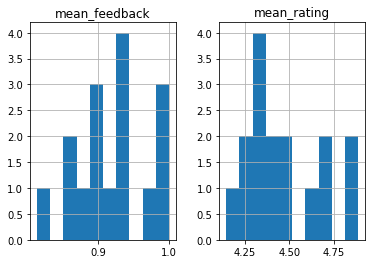

In [ ]:
#Distribution
plt.figure(figsize=(20,10))
means_df.hist();

Abaixo, evidencio os produtos que estão abaixo da média de *feedback*.

In [ ]:
#Below-average variations of feedback
means_df[means_df.mean_feedback < 0.919395].sort_values('mean_feedback', ascending=False)

variation  mean_feedback  mean_rating
12  White  Plus       0.897436     4.358974
11  Black  Plus       0.896296     4.370370
8   White  Spot       0.889908     4.311927
10  White  Show       0.870588     4.282353
7   Black  Spot       0.867220     4.311203
5         Black       0.865900     4.233716
6         White       0.813187     4.142857

Abaixo evidencio os produtos que estão abaixo da média de *rating*.

In [ ]:
#Below-average variations of rating
means_df[means_df.mean_rating < 4.468555].sort_values('mean_rating', ascending=False)

variation  mean_feedback  mean_rating
14         Black  Dot       0.930233     4.453488
15         White  Dot       0.934783     4.423913
11        Black  Plus       0.896296     4.370370
12        White  Plus       0.897436     4.358974
3   Sandstone Fabric        0.933333     4.355556
8         White  Spot       0.889908     4.311927
7         Black  Spot       0.867220     4.311203
10        White  Show       0.870588     4.282353
5               Black       0.865900     4.233716
6               White       0.813187     4.142857

Ressalto que se um produto recebesse apenas nota 4, seu feedback médio seria 1. Se um outro produto recebece apenas uma nota 3 e as demais sendo 5, seu feedback médio seria menor do que 1. A probabilidade de este produto ser melhor avaliado do que aquele, de acordo com o público, é evidente, entretanto, em termos de feedback médio, o mesmo seria inferior. Sendo assim, a nota média (*mean rating*) é o que importa definitivamente, sendo o *mean feedbac* apenas um suporte de análise para melhor compreensão.

Sendo assim, a última tabela, imediatamente acima gerada, apresenta os produtos que evidentemente estão com suas avaliações abaixo da média. Há 10 produtos de 16.

Guardemos que são produtos bem avaliados, contudo, estão abaixo da média quando consideradas as notas médias das 16 variações.

A coluna *verified reviews* é o target do projeto.

In [ ]:
#Visualizing  texts
feedbacks_df.verified_reviews

date
2018-07-31                                        Love my Echo!
2018-07-31                                            Loved it!
2018-07-31    Sometimes while playing a game, you can answer...
2018-07-31    I have had a lot of fun with this thing. My 4 ...
2018-07-31                                                Music
                                    ...                        
2018-07-30    Perfect for kids, adults and everyone in betwe...
2018-07-30    Listening to music, searching locations, check...
2018-07-30    I do love these things, i have them running my...
2018-07-30    Only complaint I have is that the sound qualit...
2018-07-29                                                 Good
Name: verified_reviews, Length: 3150, dtype: object

A fim de análise, construo duas colunas de contagem, uma referente à quantidade de palavras por texto e outra referente à quantidade de caracteres por texto.

In [ ]:
#Creating counting cols
count = []
for line in feedbacks_df.verified_reviews:
  _line = line.split() #Separating each word
  _count = len(_line) #Counting word per line
  count.append(_count) #Stoiring values

feedbacks_df['words_count'] = count #Adding values to the data frame
feedbacks_df['strings_count'] = feedbacks_df.verified_reviews.apply(len) #Counting the number of strings and adding counts to the data frame

O resultado do procedimento é o seguinte:

In [ ]:
#Result
feedbacks_df.head(10)

rating             variation  ... words_count  strings_count
date                                      ...                           
2018-07-31       5      Charcoal Fabric   ...           3             13
2018-07-31       5      Charcoal Fabric   ...           2              9
2018-07-31       4        Walnut Finish   ...          38            195
2018-07-31       5      Charcoal Fabric   ...          34            172
2018-07-31       5      Charcoal Fabric   ...           1              5
2018-07-31       5  Heather Gray Fabric   ...          32            172
2018-07-31       3     Sandstone Fabric   ...          75            365
2018-07-31       5      Charcoal Fabric   ...          40            221
2018-07-30       5  Heather Gray Fabric   ...           2             11
2018-07-30       5  Heather Gray Fabric   ...          19            114

[10 rows x 6 columns]

Para exemplo, pode-se observar a primeira linha nas duas novas colunas, nas quais informa-se que há três palavras e 13 caracteres.
Possuir esses valores auxilia numa análise mais detalhada acerca do comportamento do usuário, de modo a obter mais satisfatórios feedbacks.

A seguir, evidencio a quantidade média de palavras por feedback.

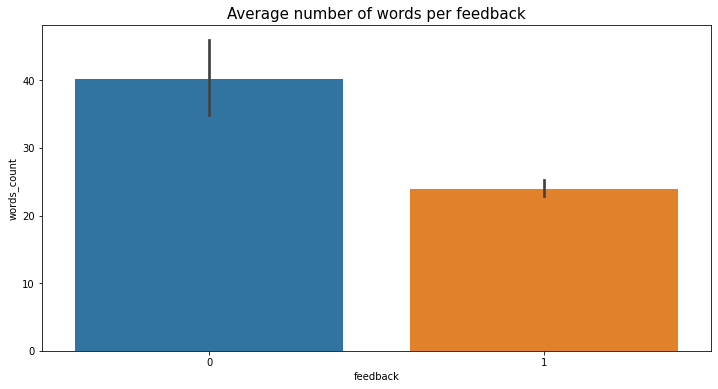

In [ ]:
#Generating graph that presents average number of words per feedback
plt.figure(figsize=(12,6))
sns.barplot(x='feedback', y='words_count', data=feedbacks_df)
plt.title('Average number of words per feedback', fontsize=15);

Como pode-se perceber, em média, os textos negativos apresentam mais palavras do que os positivos.

Através das descrições estatísticas abaixo, obtêm-se mais informações.

In [ ]:
#Stats summary for number of words used for negative texts
feedbacks_df[feedbacks_df.feedback == 0]['words_count'].describe()

count    257.000000
mean      40.256809
std       43.983087
min        0.000000
25%       10.000000
50%       26.000000
75%       54.000000
max      307.000000
Name: words_count, dtype: float64

Acima está o resumo estatístico acerca do número de palavras usadas em textos negativos. Semelhante ao gráfico, o número de palavras em média é em torno de 40. Entretanto, há um desvio padrão alto, dando uma margem de variação de modo a chegar para aproximadamente 80 palavras.

Há textos negativos que não apresentam qualquer palavra enquanto o texto negativo que apresenta mais palavras contém 307 palavras.

Uma visualização gráfica auxilia na compreensão.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


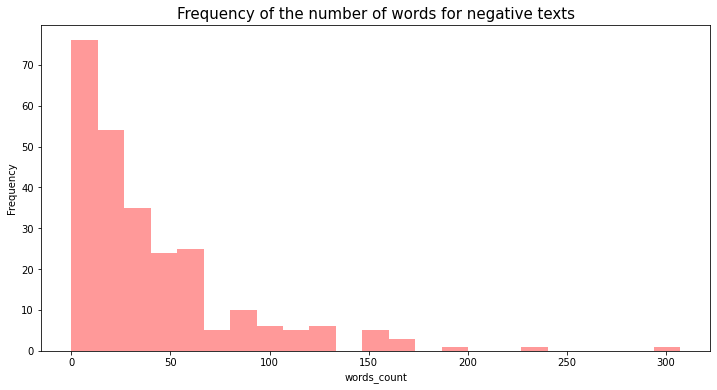

In [ ]:
#Generating grraph that presents frequency of the number of words for negative texts
plt.figure(figsize=(12,6))
sns.distplot(feedbacks_df[feedbacks_df.feedback == 0]['words_count'], kde=False, color='red')
plt.title('Frequency of the number of words for negative texts', fontsize=15)
plt.ylabel('Frequency');

Conforme o gráfico, os números mais frequentes de palavras em textos negativos estão abaixo de 50.

Em seguida, analiso o número de palavras para textos positivos

In [ ]:
#Stats summary for number of words used for positive texts
feedbacks_df[feedbacks_df.feedback == 1]['words_count'].describe()

count    2893.000000
mean       23.963705
std        33.309237
min         0.000000
25%         5.000000
50%        13.000000
75%        30.000000
max       526.000000
Name: words_count, dtype: float64

Em média, há aproximadamente 24 palavras para os textos positivos, cerca de 16 palavras a menos do que os negativos.
Os textos positivos têm uma significativa probabilidade de possuirem até 57 palavras ou mesmo nenhuma palavra.
Percebe-se, dessa forma, que conforme os gráficos, há a tendência de os textos negativos possuirem maior quantidade de palavras. Considerando  o número de palavras como variável exógena, classificadores mais sofisticados podem ser desenvolvidos em projetos que demandem um modelo classificador de texto no tocante a sentimento.

Semelhante ao gráfico gerado para a frequência de número de palavras por textos negativos, o mesmo é efetuado para os textos positivos.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


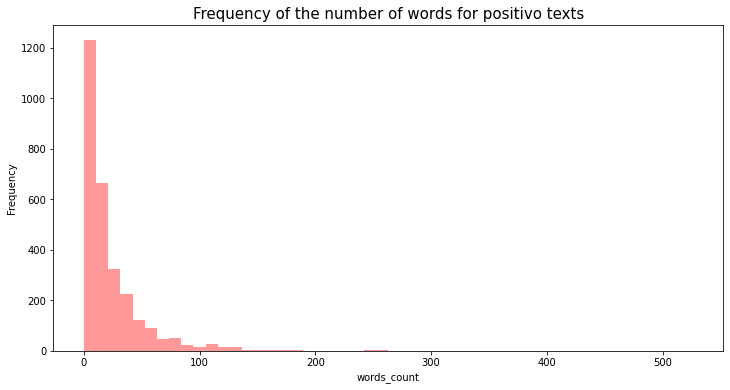

In [ ]:
#Generating grraph that presents frequency of the number of words for positive texts
plt.figure(figsize=(12,6))
sns.distplot(feedbacks_df[feedbacks_df.feedback == 1]['words_count'], kde=False, color='red')
plt.title('Frequency of the number of words for positivo texts', fontsize=15)
plt.ylabel('Frequency');

De acordo com o gráfico, o número de palavras mais frequentes estão mais próximos de 0.

Para estabelecer a relação entre os valores estatísticos, gero o gráfico seguinte:

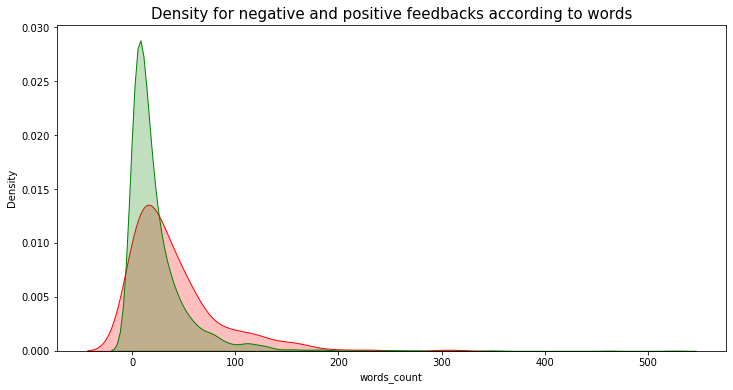

In [ ]:
#Separating negative and positive feedbacks
negative_feedbacks_df = feedbacks_df[feedbacks_df.feedback==0]
positive_feedbacks_df = feedbacks_df[feedbacks_df.feedback==1]
#Generating density graph for negative and positive feedbacks
plt.figure(figsize=(12,6))
sns.kdeplot(x='words_count', data=negative_feedbacks_df, shade=True, color='red')
sns.kdeplot(x='words_count', data=positive_feedbacks_df, shade=True, color='green')
plt.title('Density for negative and positive feedbacks according to words', fontsize=15);

Quanto mais próximo de 100 palavras, maior é a probabilidade de o texto ser negativo. Quanto mais próximo de poucas palavras, maior a probabilidade de o texto ser positivo. A partir de aproximadamente 200 palavras, não há uma evidência significativa de ser um ou outro.

Assim como textos positivos tendem a apresentar menos palavras do que os textos negativos, logicamente, os textos positivos recebem menos caracteres do que os negativos. O gráfico de densidade pode fundamentar isso.

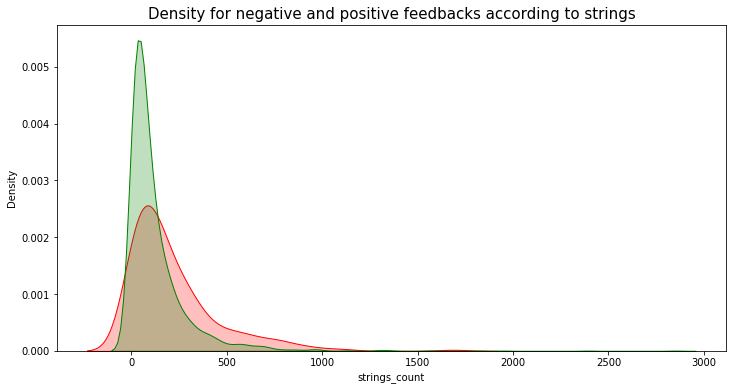

In [ ]:
#Separating negative and positive feedbacks
negative_feedbacks_df = feedbacks_df[feedbacks_df.feedback==0]
positive_feedbacks_df = feedbacks_df[feedbacks_df.feedback==1]
#Generating density graph for negative and positive feedbacks
plt.figure(figsize=(12,6))
sns.kdeplot(x='strings_count', data=negative_feedbacks_df, shade=True, color='red')
sns.kdeplot(x='strings_count', data=positive_feedbacks_df, shade=True, color='green')
plt.title('Density for negative and positive feedbacks according to strings', fontsize=15);

Como evidencia-se, quanto mais perto de 500 caracteres, maior é a probabilidade de o texto ser negativo e quanto menor a quantidade de caracteres, maior a probabilidade de ser positivo. A partir de aproximadamente 1 mil caracteres, não há evidência de ser um ou outro.

A etapa seguinte lida com o processamento de linguagem natural.

# **3 Pré-processamento de texto**
## 3.1 Lidando com emojis e emoticons

Como o objetivo do trabalho é criar word clouds positivas e negativas gerais e específicas a fim de análises, faz-se necessário tratar os textos. O primeiro  cuidado é lidar com textos com emojis ou vazios ou com apenas um espaço.

In [ ]:
#Showing reviews that have no word
feedbacks_df[feedbacks_df.strings_count == 1]['verified_reviews']

date
2018-07-30    😍
2018-07-30     
2018-07-29     
2018-07-29     
2018-07-26     
             ..
2018-07-30     
2018-07-30     
2018-07-30     
2018-07-30     
2018-07-30     
Name: verified_reviews, Length: 81, dtype: object

Evidencia-se a presença de 81 reviews que não apresentam qualquer palavra. Há a presença de emoji.

Abaixo, vistorio uma quantidade pequena de caracteres, buscando emojis e emoticons. O objetivo é tratá-los de modo que não sejam informações perdidas, mas, sim, processáveis.

In [ ]:
#Showing reviews that have emojis, emoticons and abbreviations
feedbacks_df[feedbacks_df.strings_count ==2]['verified_reviews']

date
2018-07-28    👍🏻
2018-07-26    A+
2018-07-30    ok
2018-07-30    😄😄
Name: verified_reviews, dtype: object

Para lidar com esses tipos de caracteres, um recurso apropriado é a biblioteca **emot**.

In [ ]:
#Installing emot
!pip install emot

     |████████████████████████████████| 61 kB 20 kB/s 


Acima está a importação da biblioteca.

Em seguida, importo as bibliotecas e packages que auxiliam no pré-processamento dos textos, no que concerne a emoticons e emojis.

In [ ]:
#Importing libs to handle with emoticons and emojis
import re
import pickle
from emot.emo_unicode import UNICODE_EMOJI, EMOTICONS_EMO

Após importá-las, apresento os emoticons e emojis presentes em UNICODE_EMOJI e EMOTICONS_EMO

In [ ]:
#Emoticons presents
emoticons = EMOTICONS_EMO #not printed because of github projected overflow

In [ ]:
#Emoticons presents
emoji = UNICODE_EMOJI # not printed because of github projected overflow

Através dessas importações, será possível realizar a conversão de emojis e emoticons para palavras, de modo que a informação permaneça disponível no conjunto de dados.

Em seguida, crio a função de conversão de emojis.

In [ ]:
# Function for converting emojis into word
def convert_emojis(text):
    for emoji in UNICODE_EMOJI:
        text = text.replace(emoji, "_".join(UNICODE_EMOJI[emoji].replace(",","").replace(":","").split()))
    return text

A seguir, seleciono a última linha que apresenta os emojis 😄😄, a fim de testar a função.


In [ ]:
#Looking for emoji for the test of the function
feedbacks_df[feedbacks_df.strings_count ==1]['verified_reviews']

date
2018-07-30    😍
2018-07-30     
2018-07-29     
2018-07-29     
2018-07-26     
             ..
2018-07-30     
2018-07-30     
2018-07-30     
2018-07-30     
2018-07-30     
Name: verified_reviews, Length: 81, dtype: object

In [ ]:
#Selecting emoji
test = feedbacks_df[feedbacks_df.strings_count ==2]['verified_reviews'].iloc[3]

Após selecioná-lo, realizo o teste.

In [ ]:
#Testing conversion function
convert_emojis(test)

'grinning_face_with_smiling_eyesgrinning_face_with_smiling_eyes'

Como pode-se averiguar, a função funcionou devidamente.

Realizo agora a aplicação da função de maneira geral, porém, em um teste.

In [ ]:
#Aapplying function in general test
test_general = feedbacks_df.verified_reviews.apply(convert_emojis)

Após aplicar a função, apresento abaixo o resultado da aplicação de teste geral. Conforme pode-se averiguar, a função funcionou corretamente. Sendo assim, aplico a função no dataframe original.

In [ ]:
#Checking result
test_general[[60, 2436, 1692]]

date
2018-07-30                         smiling_face_with_heart-eyes
2018-07-30    grinning_face_with_smiling_eyesgrinning_face_w...
2018-07-28                             thumbs_uplight_skin_tone
Name: verified_reviews, dtype: object

In [ ]:
#Applying function in original dataframe
feedbacks_df.verified_reviews = feedbacks_df.verified_reviews.apply(convert_emojis)

#Checking the conversion in original dataframe
feedbacks_df[feedbacks_df.strings_count == 2]['verified_reviews']

date
2018-07-28                             thumbs_uplight_skin_tone
2018-07-26                                                   A+
2018-07-30                                                   ok
2018-07-30    grinning_face_with_smiling_eyesgrinning_face_w...
Name: verified_reviews, dtype: object

De acordo com o retornado, as linhas que antes apresentavam emojis, não apresentam mais.

Faz-se necessário buscar por emoticons. O *for* abaixo indica se há ou não emoticons presentes no dataframe. Caso nada seja retornado, isso indica que não há emoticons.

De fato, nenhum emoticon é retornado, indicando que não há qualquer um entre as linhas da coluna *verified reviews*.

In [ ]:
#Searching for emoticons
for searching_emoticon in feedbacks_df.verified_reviews:
  if searching_emoticon in EMOTICONS_EMO:
    print(searching_emoticon)

## 3.2 Lidando com os textos e pontuações



Nessa presente etapa, tenho como objetivo separar os textos entre positivos e negativos, unificar as sentenças positivas com positivas e negativas com negativas e, por fim, gerar nuvem de palavras para análise.

A primeira parte é criar uma variável do tipo lista contendo as sentenças, conforme demonstrado abaixo.

In [ ]:
#Storing only positive sentences as list
positive_sentences = positive_feedbacks_df.verified_reviews.tolist()
type(positive_sentences), len(positive_sentences)

(list, 2893)

Após isso, verifico a lista.

In [ ]:
#Checking positive list
positive_sentences[:10]

['Love my Echo!',
 'Loved it!',
 'Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home.',
 'I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well.',
 'Music',
 'I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do.',
 'Without having a cellphone, I cannot use many of her features. I have an iPad but do not see that of any use.  It IS a great alarm.  If u r almost deaf, you can hear her alarm in the bedroom from out in the living room, so that is reason enough to keep her.It is fun to ask random questions to hear her response.  She does not seem to be very smartbon politics yet.',
 "I think this is the 5th one I've

Segundo o retornado, o procedimento foi bem sucedido. Em seguida, transformo as strings em uma somente.

In [ ]:
#Transforming positive sentences into one only string
positive_one_string = ' '.join(positive_sentences)
type(positive_one_string)

str

Conforme o retornado, têm-se uma string.

In [ ]:
#Checking variable
positive_one_string[:1000]

"Love it but the volume could definitely use a boost. If it had better built in speaker's, would definitively be a 5 star. They thought ahead and put an audio auxiliary input, so I bought a dedicated speaker for the Echo. Proved to be best way to go. This is our 2nd one and we love it! So i am not sure how i feel about the echo dot, it's so many things that i need to get used to you have to ask her the right questions or she won't understand you. This small echo dot is amazing the sounds that come out are great.it changes my nest thermostat,and my Phillips hue lights.without leaving my chair. We talk to her all the time for songs and just because we can . There aren’t dislikes about this device. Bought for my bathroom to listen when I'm in the shower. Love it. LOVE LOVE LOVE my new and free assistant! :) We have five of them. Need I say more? This was an add on for my echo system, the refurbished product works like new! I wasn't sure I really wanted one of these, but now that I have it

Como pode-se perceber, o procedimento está bem sucedido.

In [ ]:
#Lenght of the string
len(positive_one_string)

363531

Acima evidencia-se que há 363.531 caracteres.

Em seguida, inicio o processo de remoção de caracteres especiais. Inicio com a importação da biblioteca string.

In [ ]:
#Importing lib to handle with punct
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

Acima estão dispostos os caracteres especiais.
Através da função abaixo, armazeno na variável *one_string_no_punc* somente caracteres diferentes dos especiais.

In [ ]:
#Storing different carcteres from punct
positive_one_string_no_punc = [char for char in positive_one_string if char not in string.punctuation]

In [ ]:
#Checking result
print(positive_one_string[:24]) #Original
print(positive_one_string_no_punc[:24]) #New

Love my Echo! Loved it! 
['L', 'o', 'v', 'e', ' ', 'm', 'y', ' ', 'E', 'c', 'h', 'o', ' ', 'L', 'o', 'v', 'e', 'd', ' ', 'i', 't', ' ', 'S', 'o']


Conforme o resultado, o procedimmento foi corretamente efetuado. O código abaixo comprova isso.

In [ ]:
#Searching for special chars
for char in positive_one_string_no_punc:
  if char in string.punctuation:
    print(char)

A função retornaria os caracteres especiais se houvesse algum presente na variável. Nenhum foi retornado, confirmando que o procedimento anterior foi corretamente realizado.

Uma questão a destacar é que o  procedimento anterior separou as palavras em letras. Isso deve ser corrigido, o que é feito logo a seguir além da transformação das letras para minúsculas.

In [ ]:
#Joining letters and transforming them into lower
positive_one_string_no_punc_joined = ''.join(positive_one_string_no_punc)
positive_one_string_no_punc_joined_lower = positive_one_string_no_punc_joined.lower()
positive_one_string_no_punc_joined_lower[:1000]

'love it but the volume could definitely use a boost if it had better built in speakers would definitively be a 5 star they thought ahead and put an audio auxiliary input so i bought a dedicated speaker for the echo proved to be best way to go this is our 2nd one and we love it so i am not sure how i feel about the echo dot its so many things that i need to get used to you have to ask her the right questions or she wont understand you this small echo dot is amazing the sounds that come out are greatit changes my nest thermostatand my phillips hue lightswithout leaving my chair we talk to her all the time for songs and just because we can  there aren’t dislikes about this device bought for my bathroom to listen when im in the shower love it love love love my new and free assistant  we have five of them need i say more this was an add on for my echo system the refurbished product works like new i wasnt sure i really wanted one of these but now that i have it it is extremely useful get on

Segundo o retornado, as palavras estão unificadas e com letras minúsculas.

# 3.3 Lidando com Stopwords

Para lidar com stopwords e outras questões, importo a biblioteca NLTK.

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

Em seguida, importo o pacote **stopwords**.

In [ ]:
#Importing stopwords
from nltk.corpus import stopwords

In [ ]:
#Stopwords lenght
len(stopwords.words('english'))

179

Acima, apresento a quantidade de stopwords - 179. Essas 179 palavras servirão como filtro para ser apresentada uma variável contendo os textos do dataset sem a presença das stopwords. Adiante realizo outro filtro relacionado às partes do discurso.

Abaixo realizo a limpeza.

In [ ]:
#Cleaning from stopwords
positive_one_string_no_punct_no_stopwords =  [word for word in positive_one_string_no_punc_joined_lower.split() if word not in stopwords.words('english')]

#Len of char now
len(positive_one_string_no_punct_no_stopwords)

35327

In [ ]:
#Len of char before
len(positive_one_string_no_punc_joined_lower)

352960

De acordo com os valores imediatamente acima, após o procedimento de limpeza de  stopwords, a* one string* apresenta menos caracteres.

Após o procedimento, faz-se necessário novamente unificar numa string só como pode-se averiguar abaixo.

Como anteriormente, unifico as strings em uma só, estando cada uma separada por um espaço.

In [ ]:
#Joining chars
positive_one_string_no_punct_no_stopwords_joined = ' '.join(positive_one_string_no_punct_no_stopwords)
positive_one_string_no_punct_no_stopwords_joined[:1000]

'love volume could definitely use boost better built speakers would definitively 5 star thought ahead put audio auxiliary input bought dedicated speaker echo proved best way go 2nd one love sure feel echo dot many things need get used ask right questions wont understand small echo dot amazing sounds come greatit changes nest thermostatand phillips hue lightswithout leaving chair talk time songs aren’t dislikes device bought bathroom listen im shower love love love love new free assistant five need say add echo system refurbished product works like new wasnt sure really wanted one extremely useful get one youll love perfect works great problems refurbished great product works great looks works perfect glad got good deal good new one bought 1000 less everything perfect echo works price great deal issues dots speaker bit tinny good second unit like attach external speaker soundgood buy echos already went one refurbished save bucks works great love new generation one rubber bottom nice tha

## Lidando com partes do discurso (POS)

Antes de gerar as word clouds, realizo o último filtro. A fim de obter uma visualização mais clara acerca do destacado pelos usuários dos produtos, aplico uma função que mantém de fora das word clouds as classes gramaticais pronomes, determinantes, verbos auxiliares, adposições, símbolos e números. Verbos, substantivos e advérbios podem auxiliar melhor na compreensão dos feedbacks dos clientes.

Para isso, inicio com a importação da bibliteca **spaCy**. Através dela, tenho a função pos_ (part-of-speech). Essa será fundamental para o filtro.

In [ ]:
#Importing spacy
import spacy

Após a importação, realizo o download das configurações em língua inglesa, pois, os textos a serem tratados estão em inglês.

In [ ]:
!python3 -m spacy download en #Downloading English packages

     |████████████████████████████████| 12.0 MB 3.7 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/usr/local/lib/python3.7/dist-packages/en_core_web_sm -->
/usr/local/lib/python3.7/dist-packages/spacy/data/en
You can now load the model via spacy.load('en')


Após isso, crio um objeto spacy com as configurações de língua inglesa.

In [ ]:
#loading the model and creating object
nlp = spacy.load('en')

Conforme pode-se conferir a seguir, o objeto é do tipo spacy com configuração de língua inglesa.

In [ ]:
#Model type
type(nlp)

spacy.lang.en.English

Em seguida, crio uma variável a partir da aplicação do objeto criado nos textos pré-processados anteriormente.

In [ ]:
#Creating doc from object
doc = nlp(positive_one_string_no_punct_no_stopwords_joined)

Como pode-se perceber em seguida, a variável está criada e seu tipo é spacy preechida com tokens.

In [ ]:
type(doc), len(doc)

(spacy.tokens.doc.Doc, 36450)

Em seguida, crio o filtro relacionado às classes gramaticais. Utilizarei esse filtro nos textos gerais positivos e negativos e em textos concernentes a produtos específicos, como os que estão abaixo da média de nota de avaliação (*mean rating*).

In [ ]:
#Filtering
#Variables
general_positive_pos = []
general_positive_text = []

#Filter
for char in doc:
  if char.pos_ not in ['PRON', 'DET', 'AUX', 'ADP', 'VERB', 'SYM', 'NUM']: #Classes that do not enter into variables
    _char = char
    #print(_char.text, _char.pos_)
    general_positive_text.append(_char.text) #Storing text
    general_positive_pos.append(_char.pos_) #storing class

Após aplicá-lo, unifico os tokens em uma única string.

In [ ]:
#Joining tokens in a only string
nited_clean_positive_texts = ' '.join(general_positive_text)
united_clean_positive_texts[:1000]

'love volume definitely boost better speakers definitively star ahead audio auxiliary input dedicated speaker echo best way 2nd love sure echo dot many things right questions nt small echo dot amazing sounds greatit nest thermostatand phillips hue lightswithout chair talk time songs n’t dislikes device bathroom shower love love love new free assistant echo system product works like new nt sure really extremely useful one perfect great problems great product great looks works glad good deal good new less perfect echo price great deal issues dots speaker bit tinny good second unit like attach external speaker soundgood buy echos already save bucks great new generation rubber bottom nice thanks product use turn lights quick questions puny sound great already couple echos n’t also intercoms finally “ dropin ” feature echos family remote parts house teenagers never dinneras features mainly echos standard stuff music alarms questions etc home device amazon convenient refurb bucks brandnew on

Conforme o resultado, o procedimento está bem aplicado.

Abaixo há a quantidade de caracter no texto unificado.

In [ ]:
len(united_clean_positive_texts)

164376

# **4 Gerando Word Clouds**
## 4.1 Análises

Para gerar nuvem de palavras, importo a classe **WordCloud**, crio o objeto word cloud e aplico, inicialmente, aos textos positivos pré-processados.

In [ ]:
#Importing WordCloud
from wordcloud import WordCloud
word_cloud = WordCloud()
positive_wc = word_cloud.generate(united_clean_positive_texts)

In [ ]:
#Type
type(positive_wc)

wordcloud.wordcloud.WordCloud

De acordo com o resultado acima, tem-se um objeto wordcloud.

## **Dataframe e word cloud para serem entregues ao time de marketing**

## Palavras mais frequentes em contextos positivos: resposta à questão 3

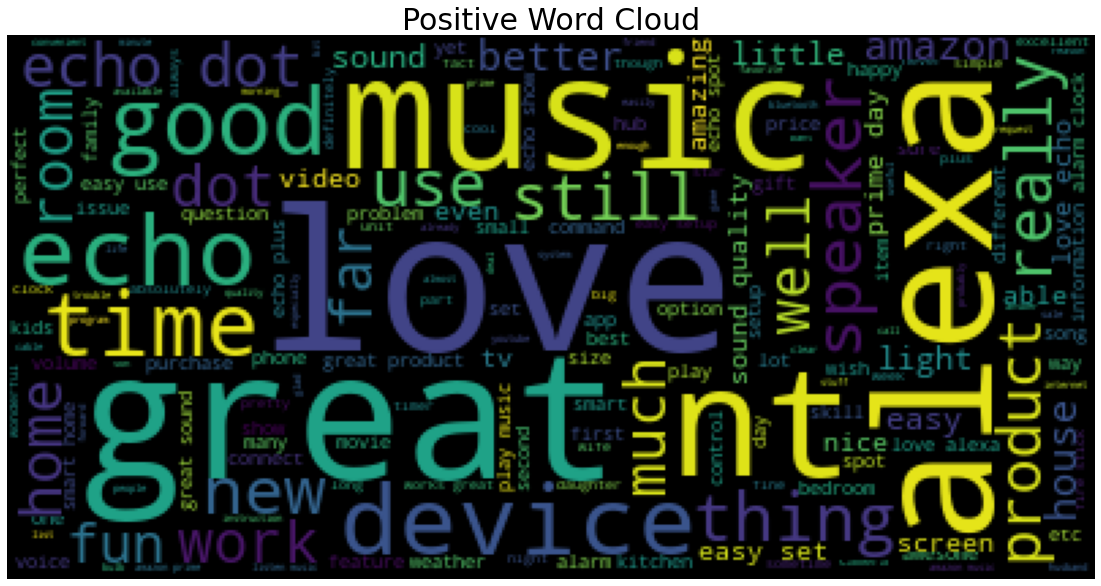

In [ ]:
#Generating positive word cloud
plt.figure(figsize=(20,10))
plt.imshow(positive_wc)
plt.title('Positive Word Cloud', fontsize=30)
plt.axis('off');

Acima tem-se a nuvem de palavras. Palavras como *love, great, music* e *alexa* destacam-se.
Para melhor compreensão da nuvem gerada, crio um dataframe apresentando a quantidade de vezes que as palavras em word cloud aparecem entre os textos positivos.

In [ ]:
#Making a dataframe that contains words and their respective count
words_count = {} #Working with dict
for words in general_positive_text: #Separating texts
  for _words in words.split(): #Separating tokens
    if _words not in words_count: #Condition
      words_count[_words] = 1
    else:
      words_count[_words] += 1

#Generating dataframe
general_positive_words_count_df = pd.DataFrame(words_count, index=['word_count'])
general_positive_words_count_df.transpose().sort_values('word_count', ascending=False).iloc[50:100,:] #Descending order

word_count
video               85
show                85
screen              84
clock               84
spot                83
amazing             82
price               79
bedroom             77
best                77
work                76
purchase            75
setup               74
hub                 73
many                73
awesome             67
phone               67
lot                 66
first               65
wish                64
light               63
speakers            62
control             62
app                 62
family              60
perfect             59
questions           59
way                 59
small               57
pretty              56
news                55
happy               55
kitchen             53
fire                53
volume              52
size                51
dots                50
gift                49
etc                 49
sure                49
though              48
bluetooth           47
original            44
yet                 44
cool                44
item                43
times               43
definitely          42
right               42
since               42
old                 42

Como pode-se observar, o dataframe foi bem gerado. Entre os textos positivos, a palavra *love* (amor) é a mais frequente, seguida de *great* (grande, sensacional).

Os mesmos procedimentos aplico em relação aos textos negativos.

# **Dataframe e word cloud para serem entregues ao time de marketing**

# Palavras mais frequentes em contextos negativos: resposta à questão 3

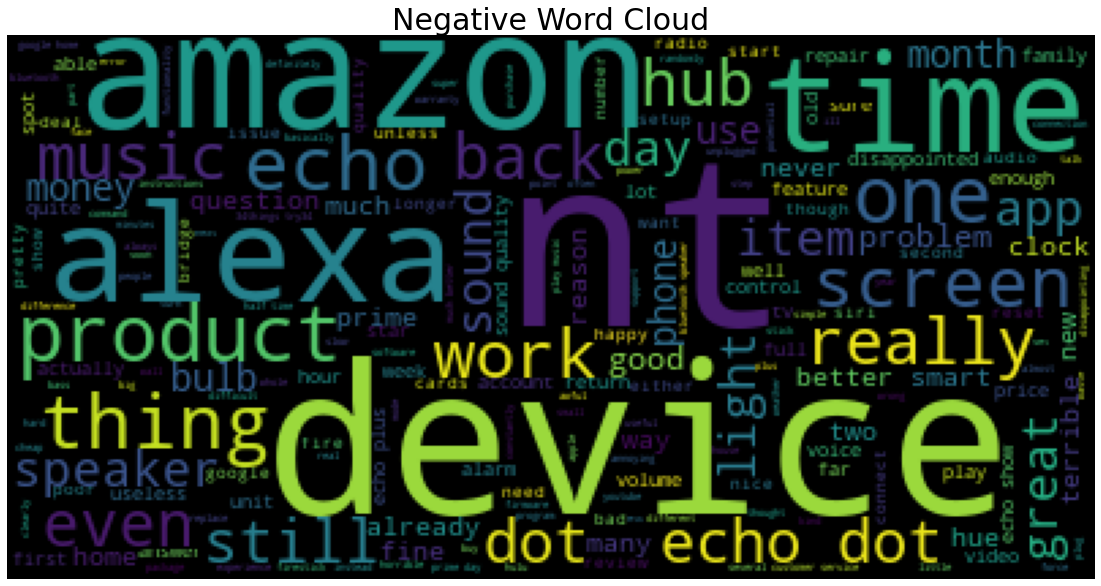

In [ ]:
#Generating negative word cloud
#Applying English setting
nlp = spacy.load('en') 

negative_sentences = negative_feedbacks_df.verified_reviews.tolist() #Storing negative sentences
negative_one_string = ' '.join(negative_sentences) #joining negative sentences as one string
negative_one_string_no_punc = [char for char in negative_one_string if char not in string.punctuation] #Remoing punctuation

#Joining letters and transforming them into lower
negative_one_string_no_punc_joined = ''.join(negative_one_string_no_punc)
negative_one_string_no_punc_joined_lower = negative_one_string_no_punc_joined.lower()

#Cleaning from stopwords
negative_one_string_no_punct_no_stopwords =  [word for word in negative_one_string_no_punc_joined_lower.split() if word not in stopwords.words('english')]

#Joining chars
negative_one_string_no_punct_no_stopwords_joined = ' '.join(negative_one_string_no_punct_no_stopwords)

#Creating doc from object
negative_doc = nlp(negative_one_string_no_punct_no_stopwords_joined)

#Filtering grammatical classes
general_negative_pos = []
general_negative_text = []
for char in negative_doc:
  if char.pos_ not in ['PRON', 'DET', 'AUX', 'ADP', 'VERB']:
    _char = char
    #print(_char.text, _char.pos_)
    general_negative_text.append(_char.text)
    general_negative_pos.append(_char.pos_)

#Joining tokenes as a string
united_clean_negative_texts = ' '.join(general_negative_text)

#Generating word cloud
negative_wc = word_cloud.generate(united_clean_negative_texts)

#Visualizing word cloud
plt.figure(figsize=(20,10))
plt.imshow(negative_wc)
plt.title('Negative Word Cloud', fontsize=30)
plt.axis('off');

In [ ]:
#Generating dataframe
general_negative_words_count = {} #Using a dict to store words and their respective counts
for words in general_negative_text: #Separating texts
  for _words in words.split(): #Separating tokens
    if _words not in general_negative_words_count:
      general_negative_words_count[_words] = 1
    else:
      general_negative_words_count[_words] += 1

#Creating dataframe
general_negative_words_count_df = pd.DataFrame(general_negative_words_count, index=['word_count'])
general_negative_words_count_df.transpose().sort_values('word_count', ascending=False).head(50)

word_count
nt              105
echo             72
amazon           60
device           54
n’t              53
alexa            42
like             39
one              39
product          39
dot              38
time             35
music            31
screen           31
really           26
sound            25
even             24
thing            24
speaker          23
back             23
work             23
devices          23
hub              22
also             22
still            21
2                19
prime            19
great            18
day              18
home             17
use              17
money            17
better           17
much             17
phone            16
good             15
quality          14
things           14
app              14
two              13
smart            13
item             13
light            13
way              13
bulb             13
months           13
times            13
play             12
fine             12
many             12
clock            12

Diferentemente da nuvem de palavras de textos em contextos positivos, a palavra mais frequente entre os textos negativos é *nt* seguida de *echo*. *Nt* refere-se a *not*. O termo tem relação com negatividade, ou seja, não funcionar, não prestar, não gostar. *Echo* refere-se ao produto em si, o que também tem coerência, pois, os produtos estão sob avaliação e os citarem é algo esperado.
Indo mais abaixo, pode-se conferir as palavras *time* (tempo, vez[es]), *music* (música), *screen* (tela), *sound* (som) e *money* (dinheiro) dentre outras. Essas palavras sinalizam problemas. Dentro de um período de 2 meses e meio, embora cada uma dessas palavras, em termos de frequência, representem uma pequena porcentagem do todo, a médio e longo prazo podem sinalizar causas de perdas de receitas. Faz-se necessário atentar-se para esses agregados dos produtos.

Para melhor compreensão, em termos matemáticos, a palavra *echo* aparece no dataset 724 vezes. Nos textos negativos aparece 42 vezes, sendo em torno de 11% dos casos. A palavra *sound* aparece 295 vezes no dataset, sendo 270 vezes entre os positivos e 25 vezes entre os negativos, ou seja, aproximadamente 10,25% dos casos.

Para selecionar os modelos abaixo da média, realizo o procedimento a seguir:

In [ ]:
#Below-average variations of rating
means_df[means_df.mean_rating < 4.468555].sort_values('mean_rating', ascending=False)

variation  mean_feedback  mean_rating
14         Black  Dot       0.930233     4.453488
15         White  Dot       0.934783     4.423913
11        Black  Plus       0.896296     4.370370
12        White  Plus       0.897436     4.358974
3   Sandstone Fabric        0.933333     4.355556
8         White  Spot       0.889908     4.311927
7         Black  Spot       0.867220     4.311203
10        White  Show       0.870588     4.282353
5               Black       0.865900     4.233716
6               White       0.813187     4.142857

De acordo com a coluna *mean rating*, esses são os produtos notas abaixo da média. Entretanto, novamente ressalto que não estão mal avaliados. Suas notas médias indicam que em geral o público está satisfeito com os mesmos.

Gerarei words clouds e dataframes de contagem de palavras para os modelos que estão com a nota média abaixo da nota média geral, dessa forma posso buscar padrões concernentes a esses produtos, de modo a produzir insights. Porém, realizarei trabalho particular para os modelos White e Black, porquanto estão nas duas últimas colocações da lista de nota média. Sendo assim, amplio o campo de observação tanto para averiguar as causas de esses mesmos produtos estarem nas últimas colocações como também auxilio na minha compreensão em relação aos aspectos em comum entre os demais produtos de nota média abaixo da nota média geral.

Inicio com o último da lista: White.

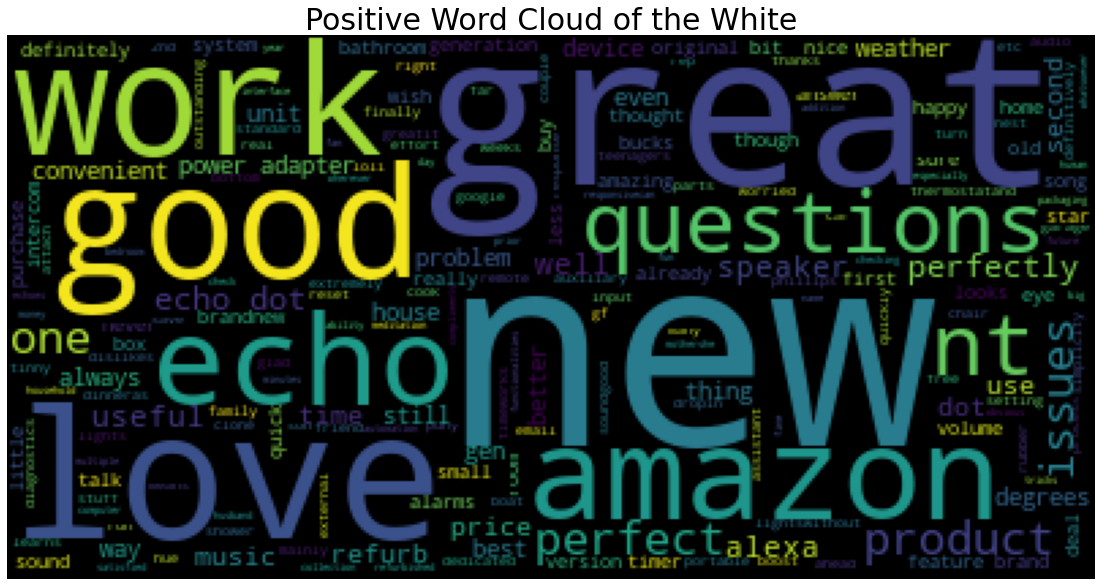

In [ ]:
#Processing positive texts of the White product

nlp = spacy.load('en')
positive_white = positive_feedbacks_df[positive_feedbacks_df.variation == 'White']
positive_sentences = positive_white.verified_reviews.tolist()
positive_one_string = ' '.join(positive_sentences)
positive_one_string_no_punc = [char for char in positive_one_string if char not in string.punctuation]

#Joining letters and transforming them into lower
positive_one_string_no_punc_joined = ''.join(positive_one_string_no_punc)
positive_one_string_no_punc_joined_lower = positive_one_string_no_punc_joined.lower()

#Cleaning from stopwords
positive_one_string_no_punct_no_stopwords =  [word for word in positive_one_string_no_punc_joined_lower.split() if word not in stopwords.words('english')]

#Joining chars
positive_one_string_no_punct_no_stopwords_joined = ' '.join(positive_one_string_no_punct_no_stopwords)

#Creating doc from object
doc = nlp(positive_one_string_no_punct_no_stopwords_joined)

#Filtering grammatical classes
positive_pos_white = []
positive_text_white = []
for char in doc:
  if char.pos_ not in ['PRON', 'DET', 'AUX', 'ADP', 'VERB', 'SYM', 'NUM']:
    _char = char
    #print(_char.text, _char.pos_)
    positive_text_white.append(_char.text)
    positive_pos_white.append(_char.pos_)
  
#Joining tokens
united_clean_positive_texts = ' '.join(positive_text_white)

#Creating words cloud
positive_wc = word_cloud.generate(united_clean_positive_texts)

#Printing words cloud
plt.figure(figsize=(20,10))
plt.imshow(positive_wc)
plt.title('Positive Word Cloud of the White', fontsize=30)
plt.axis('off');

Palavras como *work* (trabalha), *great* (ótimo, sensacional), *good* (bom), *new* (novo) entre outras, se destacam. A seguir está o dataframe com as palavras e suas respectivas frequências.

In [ ]:
#Creating positive word count dataframe for the White product
positive_words_count_white = {}
for words in positive_text_white:
  for _words in words.split():
    if _words not in positive_words_count_white:
      positive_words_count_white[_words] = 1
    else:
      positive_words_count_white[_words] += 1

white_positive_words_count_df = pd.DataFrame(positive_words_count_white, index=['word_count'])
white_positive_words_count_df.transpose().sort_values('word_count', ascending=False).head(50)

word_count
new                 21
great               21
like                15
love                14
good                10
echo                10
amazon               9
works                9
dot                  8
nt                   6
questions            6
perfect              6
perfectly            6
issues               6
well                 5
product              5
useful               5
alexa                5
ones                 5
price                4
echos                4
speaker              4
music                4
second               4
n’t                  4
use                  4
refurb               3
unit                 3
”                    3
house                3
“                    3
gen                  3
still                3
degrees              3
even                 3
weather              3
always               3
convenient           3
device               3
also                 3
power                3
best                 3
way                  3
better               3
adapter              3
sure                 2
small                2
already              2
bucks                2
generation           2

Em seguida, gero o concernente à negatividade do produto.

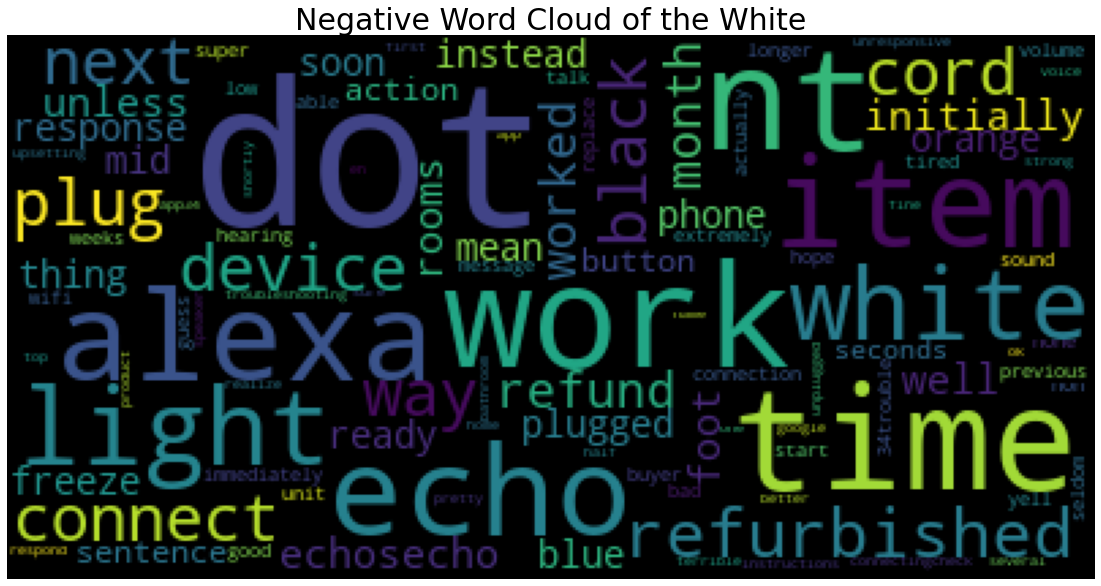

In [ ]:
#Processing negative texts of the White product

nlp = spacy.load('en')
negative_white = negative_feedbacks_df[negative_feedbacks_df.variation == 'White']
negative_sentences = negative_white.verified_reviews.tolist()
negative_one_string = ' '.join(negative_sentences)
negative_one_string_no_punc = [char for char in negative_one_string if char not in string.punctuation]

#Joining letters and transforming them into lower
negative_one_string_no_punc_joined = ''.join(negative_one_string_no_punc)
negative_one_string_no_punc_joined_lower = negative_one_string_no_punc_joined.lower()

#Cleaning from stopwords
negative_one_string_no_punct_no_stopwords =  [word for word in negative_one_string_no_punc_joined_lower.split() if word not in stopwords.words('english')]

#Joining chars
negative_one_string_no_punct_no_stopwords_joined = ' '.join(negative_one_string_no_punct_no_stopwords)

#Creating doc from object
doc = nlp(negative_one_string_no_punct_no_stopwords_joined)

#Filtering grammatical classes
negative_pos_white = []
negative_text_white = []
for char in doc:
  if char.pos_ not in ['PRON', 'DET', 'AUX', 'ADP', 'VERB', 'SYM', 'NUM']:
    _char = char
    #print(_char.text, _char.pos_)
    negative_text_white.append(_char.text)
    negative_pos_white.append(_char.pos_)

#Joining texts
united_clean_negative_texts = ' '.join(negative_text_white)

#Generating words cloud
negative_wc = word_cloud.generate(united_clean_negative_texts)

#Printing words cloud
plt.figure(figsize=(20,10))
plt.imshow(negative_wc)
plt.title('Negative Word Cloud of the White', fontsize=30)
plt.axis('off');

In [ ]:
#Creating negative word count dataframe for the White product
words_count = {}
for words in negative_text_white:
  for _words in words.split():
    if _words not in words_count:
      words_count[_words] = 1
    else:
      words_count[_words] += 1

white_negative_words_count_df = pd.DataFrame(words_count, index=['word_count'])
white_negative_words_count_df.transpose().sort_values('word_count', ascending=False).head(50)

word_count
dot                       8
nt                        4
work                      3
white                     3
echo                      3
alexa                     3
light                     3
item                      3
cord                      2
refurbished               2
black                     2
next                      2
plug                      2
times                     2
connect                   2
n’t                       2
device                    2
time                      2
way                       2
app34                     1
message                   1
seldom                    1
name                      1
respond                   1
able                      1
wifi                      1
half                      1
fine                      1
eh                        1
strong                    1
34trouble                 1
tired                     1
several                   1
hearing                   1
troubleshooting           1
unplugged                 1
connectingcheck           1
worked                    1
bathroom                  1
top                       1
instructions              1
sure                      1
app                       1
voice                     1
unresponsive              1
one                       1
shortly                   1
first                     1
product                   1
better                    1

No que se refere à funcionalidade do produto, surgem, ainda que em pequena proporção, as palavras *light* (luz) e *plug* (plugue) entre seus textos negativos. Isso pode estar indicando problemas com a luz e o plugue do modelo.

O produto seguinte a ser avaliado é o Black.

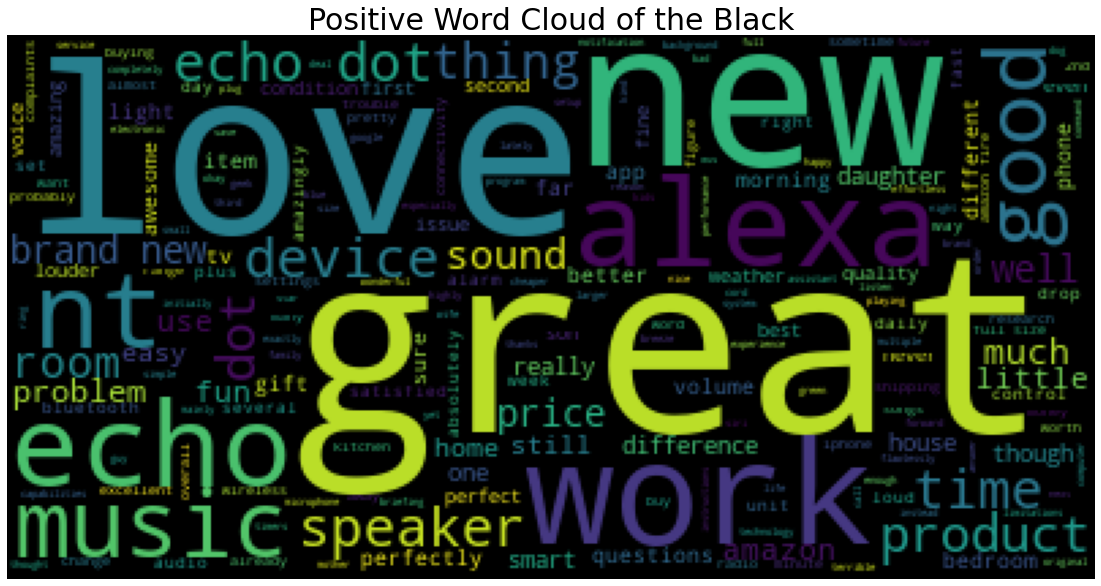

In [ ]:
#Processing positive texts of the Black product

nlp = spacy.load('en')
positive_black = positive_feedbacks_df[positive_feedbacks_df.variation == 'Black']
positive_sentences = positive_black.verified_reviews.tolist()
positive_one_string = ' '.join(positive_sentences)
positive_one_string_no_punc = [char for char in positive_one_string if char not in string.punctuation]

#Joining letters and transforming them into lower
positive_one_string_no_punc_joined = ''.join(positive_one_string_no_punc)
positive_one_string_no_punc_joined_lower = positive_one_string_no_punc_joined.lower()

#Cleaning from stopwords
positive_one_string_no_punct_no_stopwords =  [word for word in positive_one_string_no_punc_joined_lower.split() if word not in stopwords.words('english')]

#Joining chars
positive_one_string_no_punct_no_stopwords_joined = ' '.join(positive_one_string_no_punct_no_stopwords)

#Creating doc from object
doc = nlp(positive_one_string_no_punct_no_stopwords_joined)

#Filtering grammatical classes
positive_pos_black = []
positive_text_black = []
for char in doc:
  if char.pos_ not in ['PRON', 'DET', 'AUX', 'ADP', 'VERB', 'SYM', 'NUM']:
    _char = char
    #print(_char.text, _char.pos_)
    positive_text_black.append(_char.text)
    positive_pos_black.append(_char.pos_)
  
#Joining tokens
united_clean_positive_texts = ' '.join(positive_text_black)

#Creating words cloud
positive_wc = word_cloud.generate(united_clean_positive_texts)

#Printing words cloud
plt.figure(figsize=(20,10))
plt.imshow(positive_wc)
plt.title('Positive Word Cloud of the Black', fontsize=30)
plt.axis('off');

In [ ]:
#Creating positive word count dataframe for the black product
positive_words_count_black = {}
for words in positive_text_black:
  for _words in words.split():
    if _words not in positive_words_count_black:
      positive_words_count_black[_words] = 1
    else:
      positive_words_count_black[_words] += 1

black_positive_words_count_df = pd.DataFrame(positive_words_count_black, index=['word_count'])
black_positive_words_count_df.transpose().sort_values('word_count', ascending=False).head(50)

word_count
great               59
love                48
new                 48
echo                43
dot                 34
alexa               29
like                28
works               24
nt                  23
music               23
good                20
speaker             15
time                15
brand               14
product             14
sound               13
price               12
well                12
n’t                 12
much                11
things              11
devices             10
room                10
work                10
amazon              10
use                  9
device               9
little               9
fun                  9
easy                 8
still                8
home                 8
problems             7
daughter             7
though               7
house                7
smart                7
difference           7
really               7
awesome              6
thing                6
different            6
sure                 6
questions            6
morning              6
far                  6
item                 6
bedroom              6
phone                6
perfectly            6

Para melhor compreensão, executo antes os aspectos negativos.

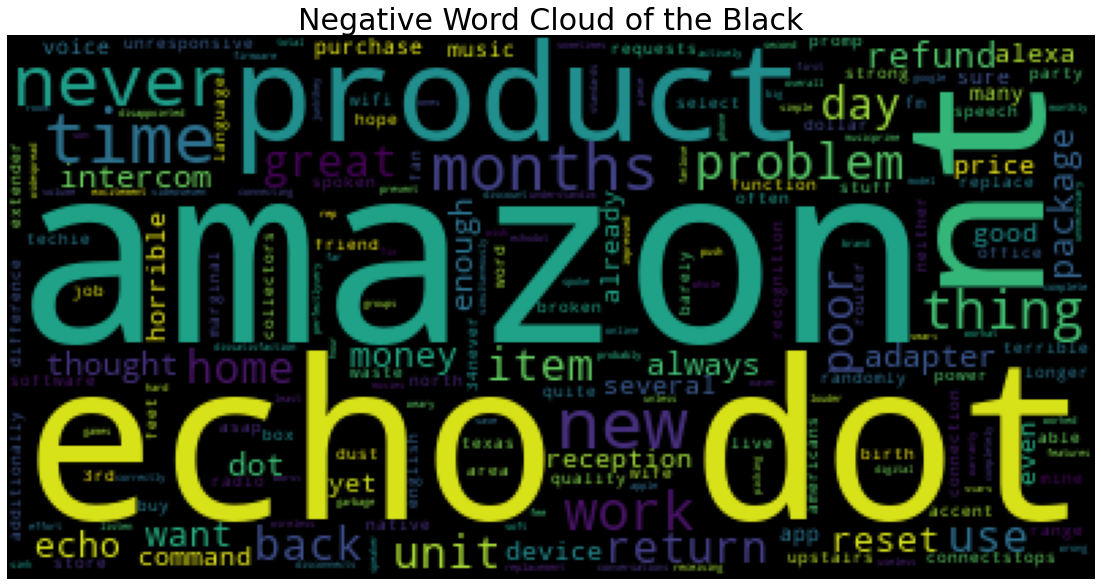

In [ ]:
#Processing negative texts of the black product

nlp = spacy.load('en')
negative_black = negative_feedbacks_df[negative_feedbacks_df.variation == 'Black']
negative_sentences = negative_black.verified_reviews.tolist()
negative_one_string = ' '.join(negative_sentences)
negative_one_string_no_punc = [char for char in negative_one_string if char not in string.punctuation]

#Joining letters and transforming them into lower
negative_one_string_no_punc_joined = ''.join(negative_one_string_no_punc)
negative_one_string_no_punc_joined_lower = negative_one_string_no_punc_joined.lower()

#Cleaning from stopwords
negative_one_string_no_punct_no_stopwords =  [word for word in negative_one_string_no_punc_joined_lower.split() if word not in stopwords.words('english')]

#Joining chars
negative_one_string_no_punct_no_stopwords_joined = ' '.join(negative_one_string_no_punct_no_stopwords)

#Creating doc from object
doc = nlp(negative_one_string_no_punct_no_stopwords_joined)

#Filtering grammatical classes
negative_pos_black = []
negative_text_black = []
for char in doc:
  if char.pos_ not in ['PRON', 'DET', 'AUX', 'ADP', 'VERB', 'SYM', 'NUM']:
    _char = char
    #print(_char.text, _char.pos_)
    negative_text_black.append(_char.text)
    negative_pos_black.append(_char.pos_)

#Joining texts
united_clean_negative_texts = ' '.join(negative_text_black)

#Generating words cloud
negative_wc = word_cloud.generate(united_clean_negative_texts)

#Printing words cloud
plt.figure(figsize=(20,10))
plt.imshow(negative_wc)
plt.title('Negative Word Cloud of the Black', fontsize=30)
plt.axis('off');

In [ ]:
#Creating negative word count dataframe for the Black product
words_count = {}
for words in negative_text_black:
  for _words in words.split():
    if _words not in words_count:
      words_count[_words] = 1
    else:
      words_count[_words] += 1

black_negative_words_count_df = pd.DataFrame(words_count, index=['word_count'])
black_negative_words_count_df.transpose().sort_values('word_count', ascending=False).head(50)

word_count
echo               12
dot                11
amazon             10
nt                  7
product             6
never               6
months              5
time                5
new                 5
thing               4
back                3
like                3
use                 3
work                3
great               3
item                3
return              3
home                3
poor                3
price               2
problem             2
adapter             2
enough              2
many                2
even                2
voice               2
n’t                 2
reception           2
horrible            2
yet                 2
good                2
already             2
sure                2
problems            2
several             2
day                 2
device              2
music               2
unit                2
command             2
reset               2
intercom            2
always              2
money               2
thought             2
want                2
package             2
quality             1
whole               1
sink                1

Em relação ao produto Black, as palavras referentes ao tempo como *time* e *months* em âmbito negativo apresentam uma frequência considerável dentro de um período de dois meses e meio. Isso pode indicar reclamações em relação a processos tardios. Destaco *price* (preço) e *command* (comando). Preço e o comando de voz do dispositivo devem estar sob monitoria a fim de que o produto não cresça em insatisfação. 
Considerando os termos positivos, o produto está bem avaliado, como indica sua nota média, ainda que esteja abaixo da média geral.

Em seguida, gero uma nuvem de palavras de contexto negativo e outra de palavras de contexto positivo para os produtos que estão abaixo da média. Isso auxilia na identificação de padrão. Também gero os dataframes de frequência de palavras para ambos aspectos (positivo e negativo).

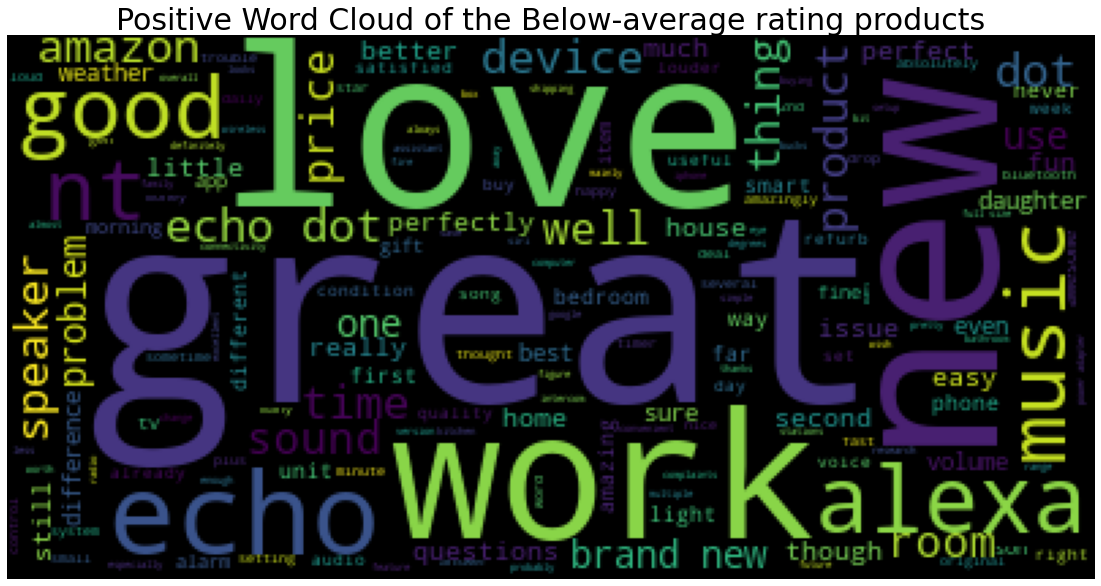

In [ ]:
#Processing positive texts of the below-average rating products
variations = ['White', 'Black', 'White Show', 'Black Spot', 'White Spot', 'Sandstone Fabric', 'White Plus', 'Black Plus', 'White Dot', 'Black Dot']
below_mean_texts = []
for var in variations:
  for texts in positive_feedbacks_df[positive_feedbacks_df.variation == var]['verified_reviews']:
    for token in texts.split():
      below_mean_texts.append(token)

nlp = spacy.load('en')
positive_one_string = ' '.join(below_mean_texts)
positive_one_string_no_punc = [char for char in positive_one_string if char not in string.punctuation]

#Joining letters and transforming them into lower
positive_one_string_no_punc_joined = ''.join(positive_one_string_no_punc)
positive_one_string_no_punc_joined_lower = positive_one_string_no_punc_joined.lower()

#Cleaning from stopwords
positive_one_string_no_punct_no_stopwords =  [word for word in positive_one_string_no_punc_joined_lower.split() if word not in stopwords.words('english')]

#Joining chars
positive_one_string_no_punct_no_stopwords_joined = ' '.join(positive_one_string_no_punct_no_stopwords)

#Creating doc from object
doc = nlp(positive_one_string_no_punct_no_stopwords_joined)

#Filtering grammatical classes
positive_below_mean_pos = []
positive_below_mean_text = []
for char in doc:
  if char.pos_ not in ['PRON', 'DET', 'AUX', 'ADP', 'VERB', 'SYM', 'NUM']:
    _char = char
    #print(_char.text, _char.pos_)
    positive_below_mean_text.append(_char.text)
    positive_below_mean_pos.append(_char.pos_)
  
#Joining tokens
united_clean_positive_texts = ' '.join(positive_below_mean_text)

#Creating words cloud
positive_wc = word_cloud.generate(united_clean_positive_texts)

#Printing words cloud
plt.figure(figsize=(20,10))
plt.imshow(positive_wc)
plt.title('Positive Word Cloud of the Below-average rating products', fontsize=30)
plt.axis('off');


Como pode-se perceber tanto na nuvem de palavras acima quanto no dataframe abaixo, palavras como *great*, *new* e *love* tendem a fazer parte do discurso positivo em relação aos produtos de nota média abaixo da nota média geral.

In [ ]:
#Creating positive word count dataframe for the black product
words_count_positive_below_mean_text = {}
for words in positive_below_mean_text:
  for _words in words.split():
    if _words not in words_count_positive_below_mean_text:
      words_count_positive_below_mean_text[_words] = 1
    else:
      words_count_positive_below_mean_text[_words] += 1

words_count_positive_below_mean_text_df = pd.DataFrame(words_count_positive_below_mean_text, index=['word_count'])
words_count_positive_below_mean_text_df.transpose().sort_values('word_count', ascending=False).head(50)

word_count
great               80
new                 69
love                61
echo                53
like                43
dot                 42
alexa               34
works               33
good                30
nt                  29
music               27
product             19
amazon              19
speaker             19
time                17
well                17
n’t                 16
price               16
brand               16
sound               14
use                 13
things              12
perfectly           12
questions           12
device              12
much                12
room                12
little              11
work                11
perfect             11
still               11
house               10
devices             10
issues              10
fun                 10
home                10
better               9
problems             9
ones                 9
easy                 9
really               9
second               9
though               9
weather              8
volume               8
sure                 8
difference           8
thing                8
best                 8
even                 8

Para poder avaliar as palavras em contextos negativos, gero a nuvem e o dataframe concernentes a esses.

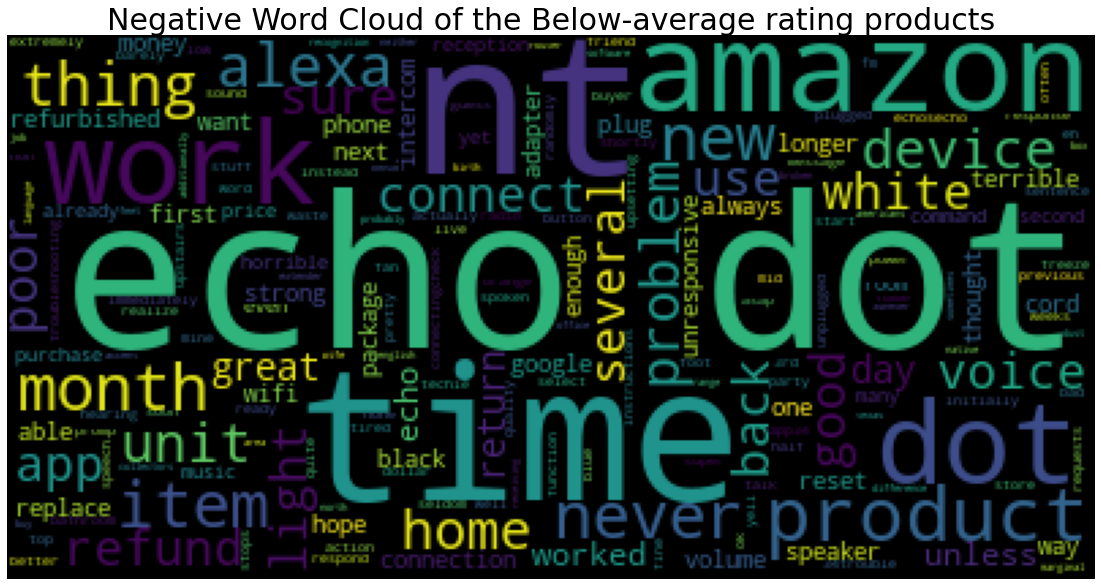

In [ ]:
#Processing negative texts of the below-average rating products
variations = ['White', 'Black', 'White Show', 'Black Spot', 'White Spot', 'Sandstone Fabric', 'White Plus', 'Black Plus', 'White Dot', 'Black Dot']
below_mean_texts = []
for var in variations:
  for texts in negative_feedbacks_df[negative_feedbacks_df.variation == var]['verified_reviews']:
    for token in texts.split():
      below_mean_texts.append(token)

nlp = spacy.load('en')
negative_one_string = ' '.join(below_mean_texts)
negative_one_string_no_punc = [char for char in negative_one_string if char not in string.punctuation]

#Joining letters and transforming them into lower
negative_one_string_no_punc_joined = ''.join(negative_one_string_no_punc)
negative_one_string_no_punc_joined_lower = negative_one_string_no_punc_joined.lower()

#Cleaning from stopwords
negative_one_string_no_punct_no_stopwords =  [word for word in negative_one_string_no_punc_joined_lower.split() if word not in stopwords.words('english')]

#Joining chars
negative_one_string_no_punct_no_stopwords_joined = ' '.join(negative_one_string_no_punct_no_stopwords)

#Creating doc from object
doc = nlp(negative_one_string_no_punct_no_stopwords_joined)

#Filtering grammatical classes
negative_below_mean_pos = []
negative_below_mean_text = []
for char in doc:
  if char.pos_ not in ['PRON', 'DET', 'AUX', 'ADP', 'VERB', 'SYM', 'NUM']:
    _char = char
    #print(_char.text, _char.pos_)
    negative_below_mean_text.append(_char.text)
    negative_below_mean_pos.append(_char.pos_)
  
#Joining tokens
united_clean_negative_texts = ' '.join(negative_below_mean_text)

#Creating words cloud
negative_wc = word_cloud.generate(united_clean_negative_texts)

#Printing words cloud
plt.figure(figsize=(20,10))
plt.imshow(negative_wc)
plt.title('Negative Word Cloud of the Below-average rating products', fontsize=30)
plt.axis('off');


In [ ]:
#Creating negative word count dataframe for the black product
words_count_negative_below_mean_text = {}
for words in negative_below_mean_text:
  for _words in words.split():
    if _words not in words_count_negative_below_mean_text:
      words_count_negative_below_mean_text[_words] = 1
    else:
      words_count_negative_below_mean_text[_words] += 1

words_count_negative_below_mean_text_df = pd.DataFrame(words_count_negative_below_mean_text, index=['word_count'])
words_count_negative_below_mean_text_df.transpose().sort_values('word_count', ascending=False).head(50)

word_count
dot                   19
echo                  15
nt                    11
amazon                10
time                   7
product                7
never                  6
work                   6
item                   6
thing                  5
new                    5
months                 5
n’t                    4
alexa                  4
device                 4
home                   4
light                  3
several                3
good                   3
back                   3
like                   3
sure                   3
use                    3
poor                   3
connect                3
return                 3
unit                   3
times                  3
great                  3
white                  3
voice                  3
black                  2
cord                   2
terrible               2
also                   2
strong                 2
google                 2
first                  2
unresponsive           2
speaker                2
way                    2
day                    2
worked                 2
app                    2
adapter                2
problems               2
yet                    2
already                2
command                2
even                   2

Chamo a atenção para as palavras *time* (tempo), *device* (dispositivo), *light* (luz), *voice* (voz), *unresponsive* (indiferente), *speaker* (alto-falante), *adapter* (adaptador), *command* (comando), *price* (preço), *wifi*, *plug* (plugue) e *volume* (volume). São palavras com baixa frequência nos contextos negativos, todavia, isso aponta para um alerta em relação à produção ou logística de entrega dos produtos. Os podutos podem estar sendo entregues com defeitos.

## **Considerações Finais**

**O que esperar?**

Como já abordado anteriormente, em geral, os produtos tem sido bem avaliados pelos consumidores num espaço de dois meses e meio, havendo um total de 92% dos feedbacks sendo positivos e 8% sendo negativos. Ressalto que devido ao curto período, alguns produtos foram sobremodo mais avaliados do que outros, como é, por exemplo, o caso de Walnut Finish e Oak Finish que possuem mui menor frequência de avaliação do que Black Dot. Essa inferioridade de frequência somada ao curto intervalo de tempo colocam aqueles dois primeiros produtos citados em uma condição de destaque no quadro de avaliação, como os mais bem avaliados, porém, não configurando-se em sucesso de mercado dentro do período citado, haja visto a questão da baixa frequência de avaliação para os mesmos. Obviamente que a longo prazo ter-se-á respostas mais contundentes. Dito isso, sublinho que as expectativas estão otimistas para com esses dois produtos, em especial, e para com os demais.

**Desempenho dos dispositivos**

Entre os produtos que estão abaixo da nota média geral, ainda que bem avaliados, há baixíssima frequência de palavras que arremetam à problemas nos dispositivos, todavia, ressalta-se que faz-se necessário um acompanhamento para com a produção e para com o processo de entrega dos produtos. Propagandas negativas podem afastar clientes zelosos. 

Alguns termos presentes em contextos negativos para se atribuir atenção são *music* (música), *tela* (tela), *sound* (som), *speaker* (alto-falante) e *light(s)* (luzes), pois, esses termos em contextos negativos podem estar indicando má funcionalidade em dispositivos. Essas palavras, com conotação negativa, aparecem, em média, em aproximadamente 13% de suas freuqências. Em média, em torno de 87% das vezes que aparecem em textos, elas são positivas.

Sugiro um especionamento em relação ao processo de averiguação de qualidade da metéria prima e dos produtos finais e o processo de entrega dos mesmos, a fim de que, havendo inadequações nos processos, sejam corrigidas objetivando redução da insatisfação do cliente em relação a produtos entregues com danos.



Enfatizo que, apesar desses poucos contra-pontos dentro do período citado, em geral, os clientes estão satisfeitos com os produtos. Em média, os produtos apresentam uma avaliação de aproximadamente 4.47, sendo a nota máxima 5. O produto de menor nota média é a variação White com 4.14, enquanto o de maior nota média é a variação Walnut Finish com 4.88.